## Projeto Final Big Data Science - Semantix

### 1. Importação dos pacotes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot
import plotly.io as pio
pio.renderers.default = "svg"

### 2. Leitura dos dados

In [2]:
# Leitura dos dados
dados = pd.read_csv(r'C:\Users\laila\Documents\SEMANTIX_PROJETO_FINAL\microdados_enem_2021\DADOS\MICRODADOS_ENEM_2021.csv', sep=';')
dados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B
3,210052128335,2021,3,M,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,B,B
4,210051353021,2021,2,F,1,3,1,2,0,2,...,B,A,A,B,A,B,E,A,B,B


In [3]:
# Ajustes no dataset

# Divisão dos dados por tipo

partic = dados.iloc[:, 0:12]
escola = dados.iloc[:, 12:19]
local_prova = dados.iloc[:, 19:23]
prova_obj = dados.iloc[:, 23:44]
redacao = dados.iloc[:, 44:51]
socioeco = dados.iloc[:, 51:76]

In [4]:
# Visualização dos dados particionados

prova_obj.head()

,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,...,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT
0,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,...,NaN,NaN,BBCCECEABCEABADDAAEECBEBADADAAABABBABBACCCBBB,99999BADDEAEBACADADDAEABCEECDDBBAEADEDEABADBBA...,NaN,1,NaN,BEECCAEABADBCAEBAAEEDDEBBBADBCBAAEEBBBADCCBBA,ABBACAAECACDBDDADEBDDCBDCEDBEDDBBBBDCEEAADABAC...,NaN
1,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,...,461.5,DCBCCBDBCCCCCCDDCDCCCACCABCCECCCCAADCCCBBCADE,ECCDAAEBCDACBDBDECABBEAACBCBCCCDACEABEBEBACAE,99999ACECCEEBACDABACBECBBCDBDEBDDCCCDECCDDCCCC...,CDCCBCCCDCCCCBEACEECAEABECCCDCBBCABACDAEDCCEC,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE
2,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
3,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,...,659.5,CCABBDAEDBEBEDDCAAABBDAADBDCACACEDAABCEABAEBC,CBBDABAABBAAEECEBAADADBEBCAEEBEDDEBBBADBCBEDC,ABBCA99999CDECCCBADCDBCEAEBBAAEADEEADDACAEDDAB...,EACDCEACDDDDCBDDCABADAEBACDCDDEDBBCDBECACCCCA,0,CDBBBCABEDEDEAAEBACCCBDABCDCBCBDECDADCDBBEEBB,BBBAAEECBBABEECEBAAEADBCACAEABEDDEBBBADBCBADC,ABBCAEAACADDCACDCADABBBBDEBBACEADCEBDDACEEDDDB...,ECCCABBDBDDDCEDDCABXEEEBABEDCEDCCAEBADBCCECDA
4,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,...,582.6,BABCDCCBEBCD.DEDCABCBDEDAABEDADBDBCDECCAEDBCB,CAE.ACDCAAEBBEDEBCADADEDADAACEBDABBCEABBCDEAC,99999EAACBDCBECCABADBEDADCDADDCDDECABAADEBBDAC...,ACEDEBECABDABDEECBDEEADDDDBEBCEADCCADCADEDCEB,1,DABCEDEBEEBBCABEDDCBCBECDADCDAACBDCCCDBBBEBAB,EBAAEADBCACBBABEECBAAEEBBBADCBADBCEDDEBBCAEAB,ACABBACAEADCEADABDACDCEABDDADBEDDDEBBACCDDDCCE...,DCCAEBABDDCABEECCBCCEXADDCEECDEBADCABBDBDEDCE


### 3. Dados dos participantes

In [5]:
faixa_etaria = partic.groupby(['TP_FAIXA_ETARIA'])['TP_FAIXA_ETARIA'].count()
cor_raca = partic.groupby(['TP_COR_RACA'])['TP_COR_RACA'].count()
conclusao = partic.groupby(['TP_ST_CONCLUSAO'])['TP_ST_CONCLUSAO'].count()
tipo_escola = partic.groupby(['TP_ESCOLA'])['TP_ESCOLA'].count()
treinoiro = partic.groupby(['IN_TREINEIRO'])['IN_TREINEIRO'].count()

### 3.1 Análise

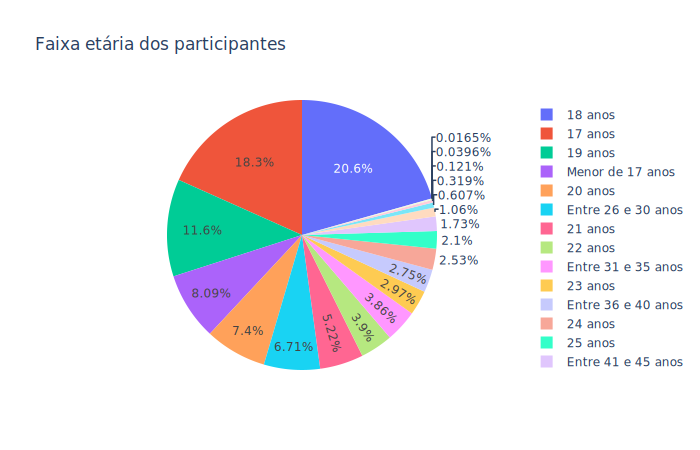

In [6]:
# Faixa etária dos participantes

labels = ['Menor de 17 anos', '17 anos', '18 anos', '19 anos', '20 anos', '21 anos', '22 anos', '23 anos', '24 anos',
          '25 anos', 'Entre 26 e 30 anos', 'Entre 31 e 35 anos', 'Entre 36 e 40 anos', 'Entre 41 e 45 anos',
         'Entre 46 e 50 anos', 'Entre 51 e 55 anos', 'Entre 56 e 60 anos', 'Entre 61 e 65 anos', 'Entre 66 e 70 anos',
         'Maior de 70 anos']

fig = px.pie(faixa_etaria, values=faixa_etaria.values, names=labels, title='Faixa etária dos participantes')
fig.show(renderer="svg")

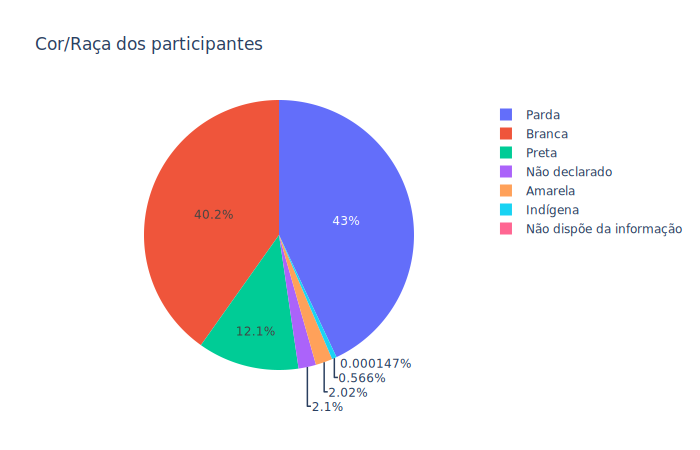

In [7]:
# Cor/raça dos participantes

labels = ['Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Não dispõe da informação']

fig = px.pie(cor_raca, values=cor_raca.values, names=labels, title='Cor/Raça dos participantes')
fig.show(renderer="svg")

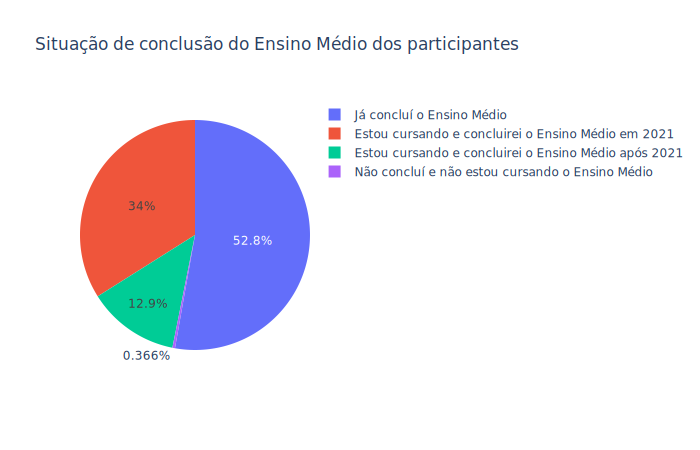

In [8]:
# Situação de conclusão do Ensino Médio dos participantes

labels = ['Já concluí o Ensino Médio', 'Estou cursando e concluirei o Ensino Médio em 2021',
          'Estou cursando e concluirei o Ensino Médio após 2021', 'Não concluí e não estou cursando o Ensino Médio']

fig = px.pie(conclusao, values=conclusao.values, names=labels, title='Situação de conclusão do Ensino Médio dos participantes')
fig.show(renderer="svg")

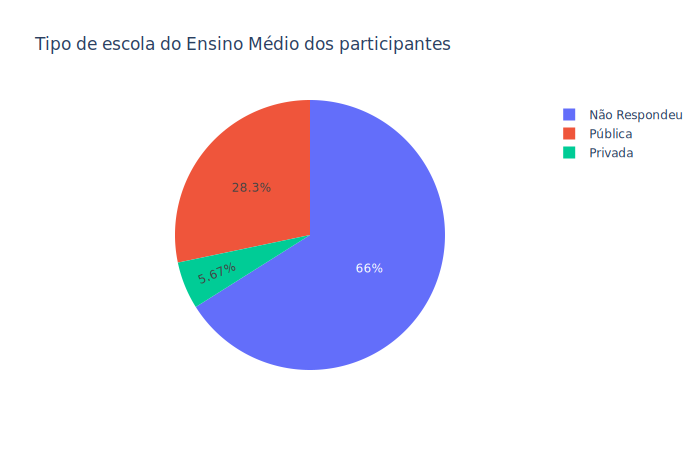

In [9]:
# Tipo de escola do Ensino Médio dos participantes

labels = ['Não Respondeu', 'Pública', 'Privada']

fig = px.pie(tipo_escola, values=tipo_escola.values, names=labels, title='Tipo de escola do Ensino Médio dos participantes')
fig.show(renderer="svg")

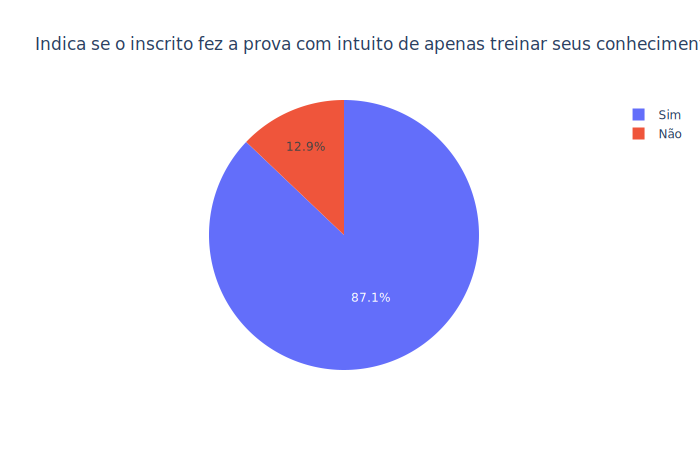

In [10]:
# Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos

labels = ['Sim', 'Não']

fig = px.pie(treinoiro, values=treinoiro.values, names=labels, title='Indica se o inscrito fez a prova com intuito de apenas treinar seus conhecimentos')
fig.show(renderer="svg")

Podemos notar que a faixa etária predominante dos participantes é entre 17 a 19 anos, o que caracteriza uma procura maior da realização do exame partindo dos adolescentes. Também vale ressaltar uma predominância muito maior de candidatos pardos e brancos comparados às outras raças/cores como amarelos, indígenas e pretos, o que reflete a realidade de acesso precário a educação de qualidade a esses cidadãos.

Podemos observar também que mais da metade dos participantes (52.8%) já terminaram o ensino médio enquanto que 34% são alunos que estão cursando o 3º ano. Esse resultado reflete no gráfico de interesses dos alunos em realizar o exame, uma vez que 87.1% realiza o exame apenas para treinar seus conhecimentos enquanto apenas 12.9% realiza a prova para ingressar em uma faculdade.

### 4. Questionário Socioeconômico

In [11]:
renda_familiar = socioeco.groupby(['Q006'])['Q006'].count()
computador = socioeco.groupby(['Q024'])['Q024'].count()
acesso_internet = socioeco.groupby(['Q025'])['Q025'].count()

### 4.1 Análise

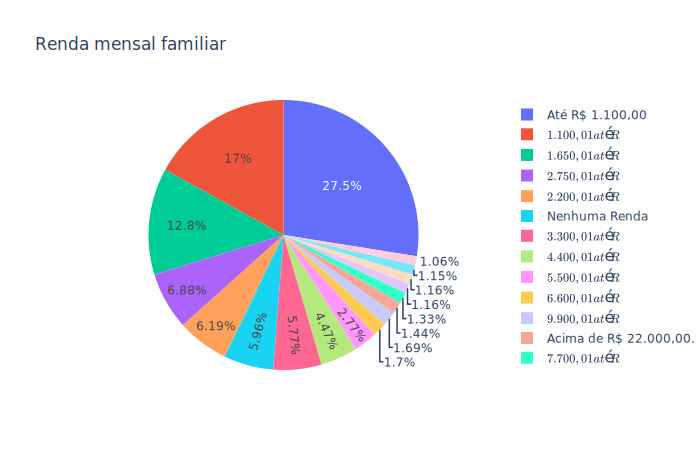

In [12]:
# Renda Mensal Familiar

labels = ['Nenhuma Renda',
'Até R$ 1.100,00',
'De R$ 1.100,01 até R$ 1.650,00.',
'De R$ 1.650,01 até R$ 2.200,00.',
'De R$ 2.200,01 até R$ 2.750,00.',
'De R$ 2.750,01 até R$ 3.300,00.',
'De R$ 3.300,01 até R$ 4.400,00.',
'De R$ 4.400,01 até R$ 5.500,00.',
'De R$ 5.500,01 até R$ 6.600,00.',
'De R$ 6.600,01 até R$ 7.700,00.',
'De R$ 7.700,01 até R$ 8.800,00.',
'De R$ 8.800,01 até R$ 9.900,00.',
'De R$ 9.900,01 até R$ 11.000,00.',
'De R$ 11.000,01 até R$ 13.200,00.',
'De R$ 13.200,01 até R$ 16.500,00.',
'De R$ 16.500,01 até R$ 22.000,00.',
'Acima de R$ 22.000,00.'
]

fig = px.pie(renda_familiar, values=renda_familiar.values, names=labels, title='Renda mensal familiar')
fig.show(renderer="svg")

Observando as rendas mensais familiares que predominam entre os participantes, percebemos que mais da metade (64.18%) se encontram nas classes sociais D/E, caracterizando uma procura maior da realização do exame por parte da população mais pobre do país.

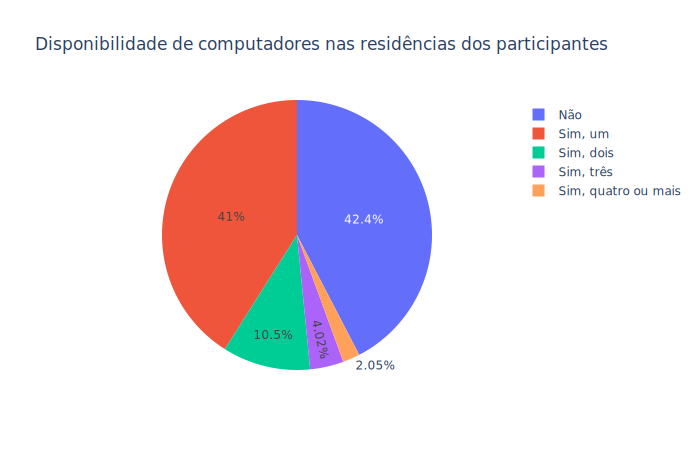

In [13]:
# Disponibilidade de computadores

labels=['Não',
'Sim, um',
'Sim, dois',
'Sim, três',
'Sim, quatro ou mais',
]

fig = px.pie(computador, values=computador.values, names=labels, title='Disponibilidade de computadores nas residências dos participantes')
fig.show(renderer="svg")

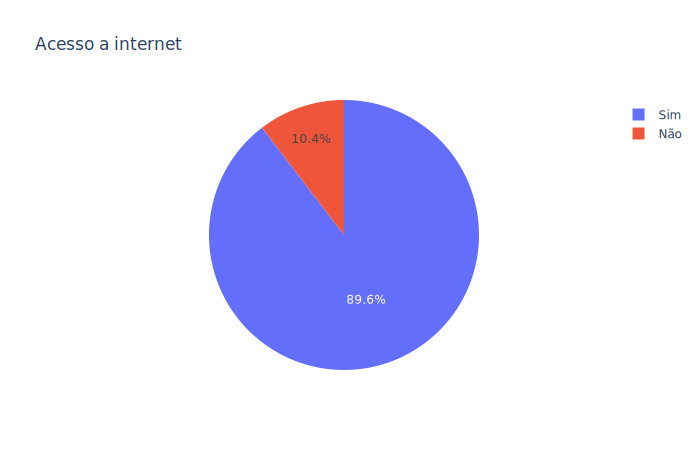

In [14]:
# Acesso a internet

labels=['Não', 'Sim']

fig = px.pie(acesso_internet, values=acesso_internet.values, names=labels, title='Acesso a internet')
fig.show(renderer="svg")

Nesses dois últimos gráficos percebemos que a maior parcela dos candidatos (83.4%) é representada por aqueles que possuem um computador em casa e os que não possuem nenhum, mostrando a realidade de 42.4% não possuirem essa vantagem. O acesso a internet é outro recurso bastante necessário nos estudos que 10.4% dos candidatos não conseguem usufruir. Todos esses indicativos mostram que uma grande parcela de candidatos acabam ficando atrás dos outros que possuem esses recursos, os deixando em desvantagem nos estudos.

### Relação: Presença Prova Objetiva x Dependência Administrativa da Escola 

In [15]:
CN_escola = dados.loc[:, ['TP_PRESENCA_CN', 'TP_DEPENDENCIA_ADM_ESC']]

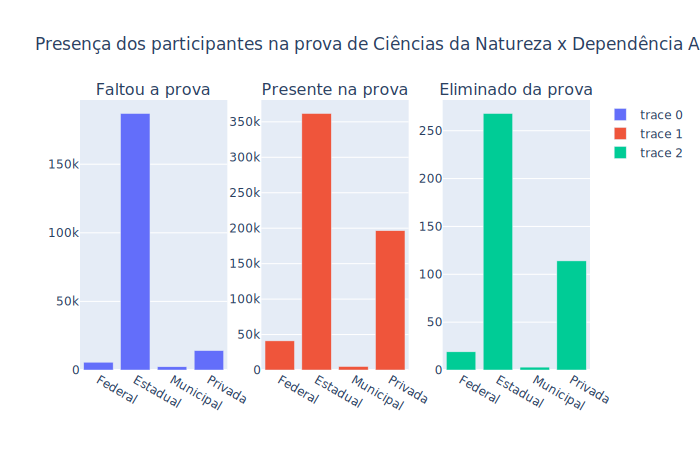

In [16]:
CN_faltou = CN_escola.loc[CN_escola['TP_PRESENCA_CN'] == 0.0].groupby(['TP_DEPENDENCIA_ADM_ESC']).count()
CN_presente = CN_escola.loc[CN_escola['TP_PRESENCA_CN'] == 1.0].groupby(['TP_DEPENDENCIA_ADM_ESC']).count()
CN_eliminado = CN_escola.loc[CN_escola['TP_PRESENCA_CN'] == 2.0].groupby(['TP_DEPENDENCIA_ADM_ESC']).count()

labels = ['Federal', 'Estadual', 'Municipal', 'Privada']

fig = make_subplots(rows=1, cols=3, subplot_titles=("Faltou a prova","Presente na prova", "Eliminado da prova"))

fig.add_trace(
    go.Bar(x=labels, y=CN_faltou['TP_PRESENCA_CN']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=labels, y=CN_presente['TP_PRESENCA_CN']),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=labels, y=CN_eliminado['TP_PRESENCA_CN']),
    row=1, col=3
)

fig.update_layout(title_text="Presença dos participantes na prova de Ciências da Natureza x Dependência Administrativa da Escola")
fig.show(renderer="svg")

Diante dessa relação podemos entender que a maioria dos participantes do ENEM são de escolas estaduais, o que os tornam maioria em todos os gráficos de barra apresentados com relação a presença deles na prova. Além disso percebemos um notório índice de eliminação dos alunos de escolas privadas para o dia das provas objetivas.

### Médias das notas x Dependência Administrativa da Escola

In [17]:
CN_notas_dep = dados.loc[:, ['NU_NOTA_CN', 'TP_DEPENDENCIA_ADM_ESC']]
CH_notas_dep = dados.loc[:, ['NU_NOTA_CH', 'TP_DEPENDENCIA_ADM_ESC']]
LC_notas_dep = dados.loc[:, ['NU_NOTA_LC', 'TP_DEPENDENCIA_ADM_ESC']]
MT_notas_dep = dados.loc[:, ['NU_NOTA_MT', 'TP_DEPENDENCIA_ADM_ESC']]
RED_notas_dep = dados.loc[:, ['NU_NOTA_REDACAO', 'TP_DEPENDENCIA_ADM_ESC']]

CN_notas_dep = CN_notas_dep.dropna()
CH_notas_dep = CH_notas_dep.dropna()
LC_notas_dep = LC_notas_dep.dropna()
MT_notas_dep = MT_notas_dep.dropna()
RED_notas_dep = RED_notas_dep.dropna()

In [18]:
CN_notas = CN_notas_dep.groupby(['TP_DEPENDENCIA_ADM_ESC']).mean()
CH_notas = CH_notas_dep.groupby(['TP_DEPENDENCIA_ADM_ESC']).mean()
LC_notas = LC_notas_dep.groupby(['TP_DEPENDENCIA_ADM_ESC']).mean()
MT_notas = MT_notas_dep.groupby(['TP_DEPENDENCIA_ADM_ESC']).mean()
RED_notas = RED_notas_dep.groupby(['TP_DEPENDENCIA_ADM_ESC']).mean()

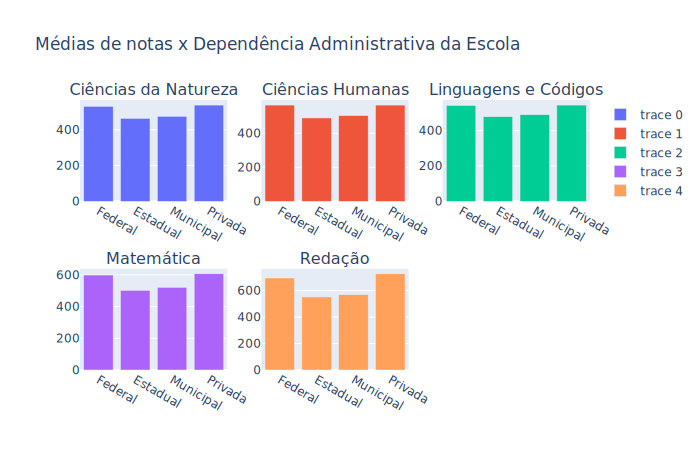

In [19]:
labels = ['Federal', 'Estadual', 'Municipal', 'Privada']

fig = make_subplots(rows=2, cols=3, subplot_titles=("Ciências da Natureza","Ciências Humanas", "Linguagens e Códigos", "Matemática", "Redação"))

fig.add_trace(
    go.Bar(x=labels, y=CN_notas['NU_NOTA_CN']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=labels, y=CH_notas['NU_NOTA_CH']),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=labels, y=LC_notas['NU_NOTA_LC']),
    row=1, col=3
)

fig.add_trace(
    go.Bar(x=labels, y=MT_notas['NU_NOTA_MT']),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x=labels, y=RED_notas['NU_NOTA_REDACAO']),
    row=2, col=2
)

fig.update_layout(title_text="Médias de notas x Dependência Administrativa da Escola")
fig.show(renderer="svg")

As médias de notas mostram os melhores desempenho vindos dos alunos de escolas de dependência admnistrativa federal e privada em todos os tipos de avaliações, onde os alunos de escolas privadas ficam com as médias mais altas. Vale ressaltar que na área de Ciências Humanas os alunos de escolas privadas e federais tiveram desempenhos praticamente iguais.

Os alunos com as menores médias são os de escolas estaduais em todas as áreas do exame, não ficando muito atrás dos alunos de escolas municipais, o que nos mostra a realidade da qualidade de ensino mais baixa nessas instituições quando comparadas com as de ensino privado e federal.